<a href="https://colab.research.google.com/github/Iamcuriousity/Alokita-Jha/blob/main/Fertilisers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [ ]:
# Load the dataset
file_path = '/content/crop_yield.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


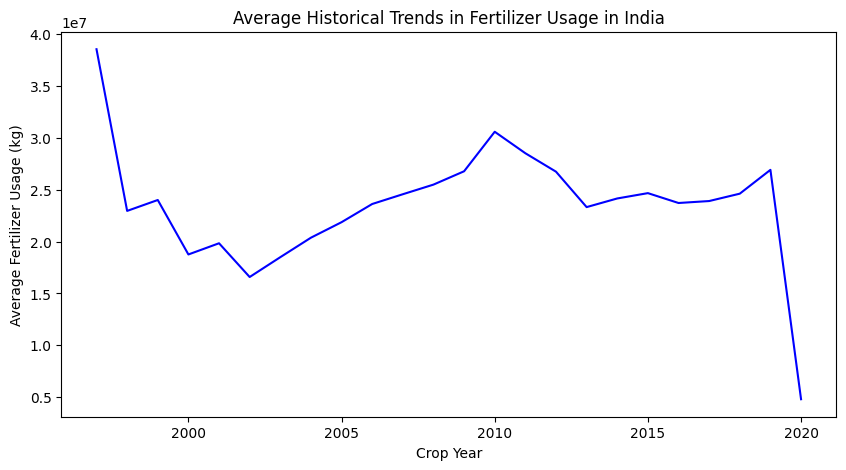

In [ ]:
# Calculate average fertilizer usage per year
avg_fertilizer_usage = df.groupby('Crop_Year')['Fertilizer'].mean().reset_index()

# Visualize historical trends in average fertilizer usage
plt.figure(figsize=(10, 5))
sns.lineplot(x='Crop_Year', y='Fertilizer', data=avg_fertilizer_usage, color='blue')
plt.title('Average Historical Trends in Fertilizer Usage in India')
plt.xlabel('Crop Year')
plt.ylabel('Average Fertilizer Usage (kg)')
plt.show()




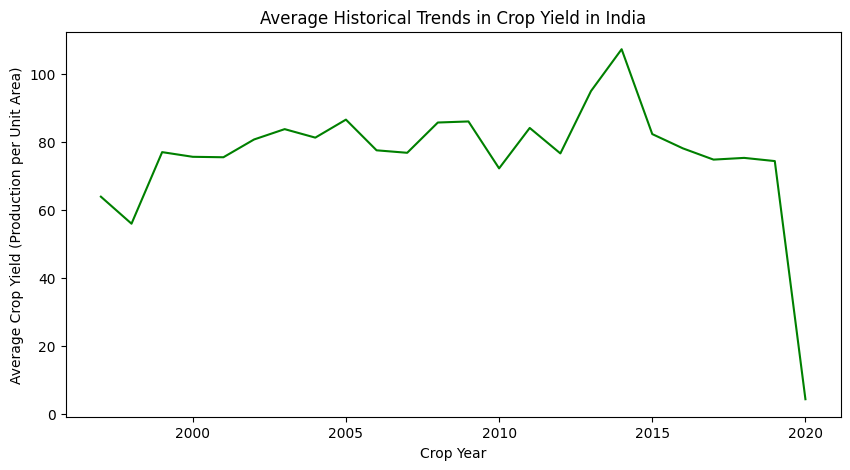

In [ ]:
# Calculate average yield per year
avg_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

# Visualize historical trends in average crop yield
plt.figure(figsize=(10, 5))
sns.lineplot(x='Crop_Year', y='Yield', data=avg_yield, color='green')
plt.title('Average Historical Trends in Crop Yield in India')
plt.xlabel('Crop Year')
plt.ylabel('Average Crop Yield (Production per Unit Area)')
plt.show()


In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Identify the top 5 states with the highest average fertilizer usage
top_states_fertilizer = df.groupby('State')['Fertilizer'].mean().nlargest(5).index

# Filter data for the top 5 states with highest fertilizer usage
top_states_fertilizer_data = df[df['State'].isin(top_states_fertilizer)]

# Define a contrasting color palette for the states
state_palette = sns.color_palette("husl", n_colors=len(top_states_fertilizer)).as_hex()

# Create subplots for fertilizer usage
fig_fertilizer = sp.make_subplots(rows=len(top_states_fertilizer), cols=1,
                                  subplot_titles=[f'Fertilizer Usage - {state}' for state in top_states_fertilizer],
                                  shared_xaxes=True,
                                  vertical_spacing=0.05)

# Add traces for fertilizer usage
for i, state in enumerate(top_states_fertilizer):
    state_data = top_states_fertilizer_data[top_states_fertilizer_data['State'] == state]
    fig_fertilizer.add_trace(go.Scatter(x=state_data['Crop_Year'], y=state_data['Fertilizer'],
                                        mode='lines+markers',
                                        name=f'{state} - Fertilizer Usage',
                                        line=dict(color=state_palette[i])),
                             row=i+1, col=1)

# Update layout for fertilizer usage
fig_fertilizer.update_layout(title_text='Trends in Fertilizer Usage Over the Years - Top 5 States',
                             showlegend=False,
                             template='plotly_dark')

# Create subplots for crop yield
fig_yield = sp.make_subplots(rows=len(top_states_fertilizer), cols=1,
                             subplot_titles=[f'Crop Yield - {state}' for state in top_states_fertilizer],
                             shared_xaxes=True,
                             vertical_spacing=0.05)

# Add traces for crop yield
for i, state in enumerate(top_states_fertilizer):
    state_data = top_states_fertilizer_data[top_states_fertilizer_data['State'] == state]
    fig_yield.add_trace(go.Scatter(x=state_data['Crop_Year'], y=state_data['Yield'],
                                   mode='lines+markers',
                                   name=f'{state} - Crop Yield',
                                   line=dict(color=state_palette[i], dash='dash')),
                        row=i+1, col=1)

# Update layout for crop yield
fig_yield.update_layout(title_text='Trends in Crop Yield Over the Years - Top 5 States',
                        showlegend=False,
                        template='plotly_dark')

# Show the interactive plots
fig_fertilizer.show()
fig_yield.show()


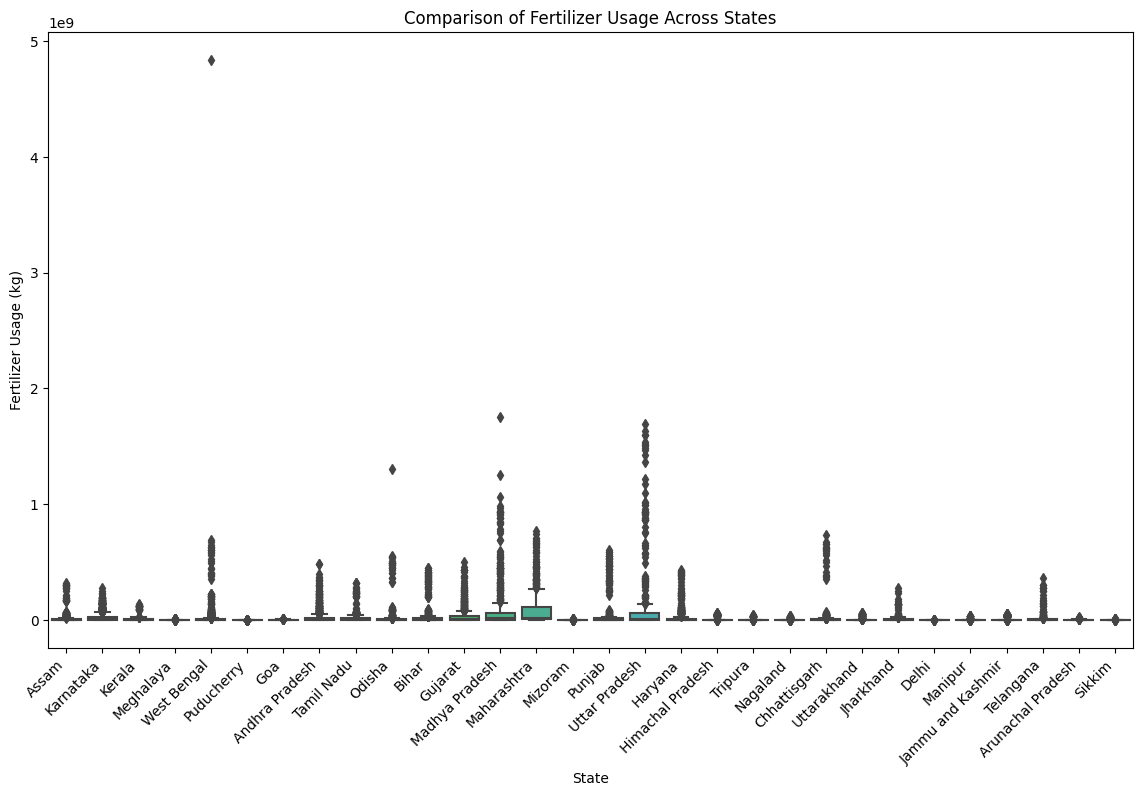

In [ ]:
# Compare fertilizer usage across different states
plt.figure(figsize=(14, 8))
sns.boxplot(x='State', y='Fertilizer', data=df)
plt.title('Comparison of Fertilizer Usage Across States')
plt.xlabel('State')
plt.ylabel('Fertilizer Usage (kg)')
plt.xticks(rotation=45, ha='right')
plt.show()


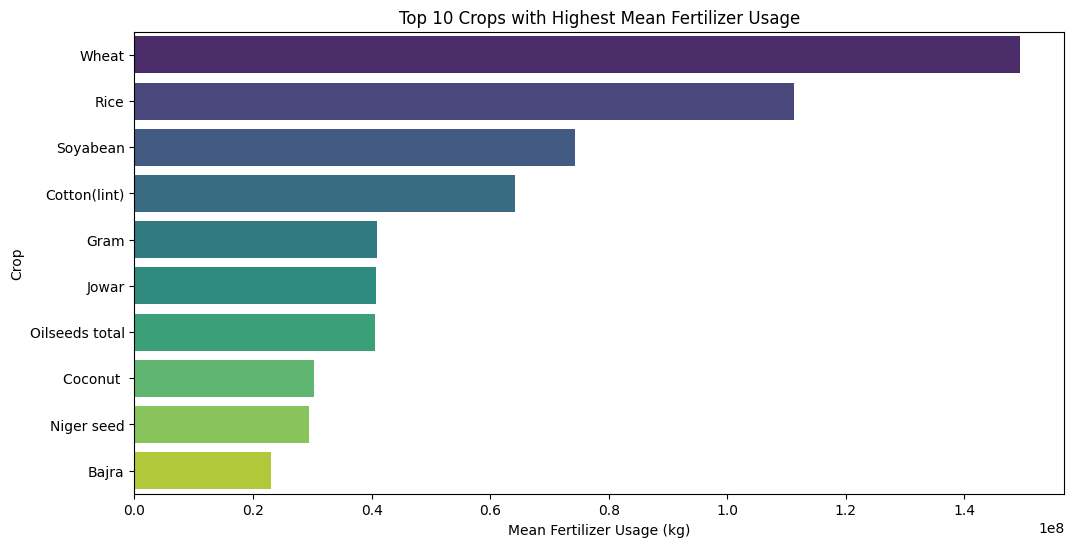

In [ ]:
# Analyze fertilizer usage patterns for specific crops
crop_fertilizer = df.groupby('Crop')['Fertilizer'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=crop_fertilizer.values, y=crop_fertilizer.index, palette='viridis')
plt.title('Top 10 Crops with Highest Mean Fertilizer Usage')
plt.xlabel('Mean Fertilizer Usage (kg)')
plt.ylabel('Crop')
plt.show()


In [ ]:
import plotly.graph_objects as go

# Identify the top 5 crops with the highest mean fertilizer usage
top_crops = df.groupby('Crop')['Fertilizer'].mean().nlargest(5).index

# Filter data for the top 5 crops
top_crops_data = df[df['Crop'].isin(top_crops)]

# Create interactive line plots for each crop
for crop in top_crops:
    crop_data = top_crops_data[top_crops_data['Crop'] == crop]

    # Create figure
    fig = go.Figure()

    # Add traces for fertilizer usage
    fig.add_trace(go.Scatter(x=crop_data['Crop_Year'], y=crop_data['Fertilizer'],
                             mode='lines+markers', name='Fertilizer Usage'))

    # Add traces for crop yield
    fig.add_trace(go.Scatter(x=crop_data['Crop_Year'], y=crop_data['Yield'],
                             mode='lines+markers', name='Crop Yield'))

    # Update layout
    fig.update_layout(title=f'Temporal Trends for {crop}',
                      xaxis_title='Crop Year',
                      yaxis_title='Value',
                      template='plotly_dark')

    # Show the interactive plot
    fig.show()


In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/content/fertilizer-use-per-hectare-of-cropland.csv"
df = pd.read_csv(file_path)

# Get the list of column names
columns_list = df.columns.tolist()

# Print the list of column names
print("Columns in the dataset:")
print(columns_list)


Columns in the dataset:
['Entity', 'Code', 'Year', 'All fertilizers use per area of cropland']


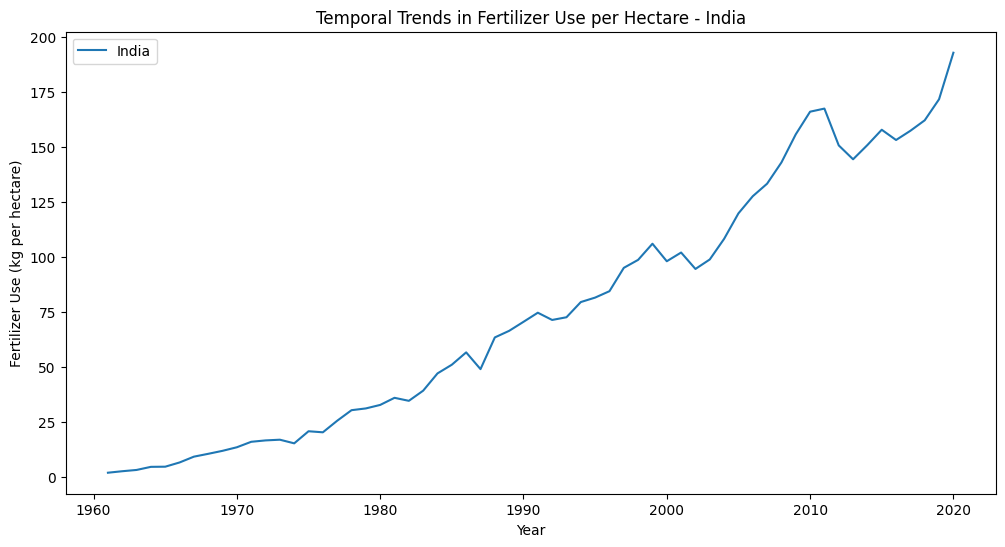

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
file_path = "/content/fertilizer-use-per-hectare-of-cropland.csv"
df = pd.read_csv(file_path)

# Choose a specific country for analysis (replace 'Afghanistan' with your desired country)
country_name = 'India'

# Filter data for the selected country
country_data = df[df['Entity'] == country_name]

# Data Visualization
plt.figure(figsize=(12, 6))

# Line plot for temporal trends
sns.lineplot(x='Year', y='All fertilizers use per area of cropland', data=country_data, label=country_name)

plt.title(f'Temporal Trends in Fertilizer Use per Hectare - {country_name}')
plt.xlabel('Year')
plt.ylabel('Fertilizer Use (kg per hectare)')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

# Load the cereal crop yield vs. fertilizer application dataset
cereal_yield_fertilizer_path = '/content/cereal-crop-yield-vs-fertilizer-application.csv'
cereal_yield_fertilizer_df = pd.read_csv(cereal_yield_fertilizer_path)

# Display basic information about the dataset
print("Column Names:\n", cereal_yield_fertilizer_df.columns)
print("\nData Types:\n", cereal_yield_fertilizer_df.dtypes)
print("\nNumber of Rows and Columns:\n", cereal_yield_fertilizer_df.shape)
print("\nSummary Statistics:\n", cereal_yield_fertilizer_df.describe())

# Display a few sample rows
print("\nSample Rows:\n", cereal_yield_fertilizer_df.head())


Column Names:
 Index(['Entity', 'Code', 'Year',
       'Cereals | 00001717 || Yield | 005419 || tonnes per hectare',
       'Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare',
       'Continent'],
      dtype='object')

Data Types:
 Entity                                                                                                   object
Code                                                                                                     object
Year                                                                                                      int64
Cereals | 00001717 || Yield | 005419 || tonnes per hectare                                              float64
Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare    float64
Continent                                                                                                object
dtype: object

Number of Rows and Columns:


In [ ]:
# Calculate rankings for crop yield and nutrient nitrogen use per area
cereal_yield_fertilizer_df['Yield_Rank'] = cereal_yield_fertilizer_df.groupby('Year')['Cereals | 00001717 || Yield | 005419 || tonnes per hectare'].rank(ascending=False, method='min')
cereal_yield_fertilizer_df['Fertilizer_Rank'] = cereal_yield_fertilizer_df.groupby('Year')['Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare'].rank(ascending=False, method='min')


In [ ]:
# Calculate average rank
cereal_yield_fertilizer_df['Average_Rank'] = (cereal_yield_fertilizer_df['Yield_Rank'] + cereal_yield_fertilizer_df['Fertilizer_Rank']) / 2


In [ ]:
# Calculate the ratio of crop yield to nitrogen application
cereal_yield_fertilizer_df['Yield_Nitrogen_Ratio'] = cereal_yield_fertilizer_df['Cereals | 00001717 || Yield | 005419 || tonnes per hectare'] / cereal_yield_fertilizer_df['Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare']

# Identify countries with the highest and lowest ratios
highest_yield_countries = cereal_yield_fertilizer_df.sort_values(by='Yield_Nitrogen_Ratio', ascending=False).head(10)
lowest_yield_countries = cereal_yield_fertilizer_df.sort_values(by='Yield_Nitrogen_Ratio', ascending=True).head(10)

# Display the results
print("Countries with Highest Yield to Nitrogen Ratio:")
print(highest_yield_countries[['Entity', 'Yield_Nitrogen_Ratio']])

print("\nCountries with Lowest Yield to Nitrogen Ratio:")
print(lowest_yield_countries[['Entity', 'Yield_Nitrogen_Ratio']])




Countries with Highest Yield to Nitrogen Ratio:
                         Entity  Yield_Nitrogen_Ratio
12012                      Togo                   inf
7657           Micronesia (FAO)                   inf
7660           Micronesia (FAO)                   inf
7661           Micronesia (FAO)                   inf
1285                      Benin                   inf
7659           Micronesia (FAO)                   inf
7658           Micronesia (FAO)                   inf
2205   Central African Republic                   inf
2193   Central African Republic                   inf
472         Antigua and Barbuda                   inf

Countries with Lowest Yield to Nitrogen Ratio:
             Entity  Yield_Nitrogen_Ratio
2979         Cyprus              0.002122
1529       Botswana              0.002792
3014         Cyprus              0.004208
1526       Botswana              0.004865
12256  Turkmenistan              0.004985
3020         Cyprus              0.004997
1530       Botsw

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Filter the dataset for India
india_data = cereal_yield_fertilizer_df[cereal_yield_fertilizer_df['Entity'] == 'India']

# Create a line chart for India's crop yield and nitrogen application over time
fig = go.Figure()

# Add traces for crop yield and nitrogen application
fig.add_trace(go.Scatter(x=india_data['Year'], y=india_data['Cereals | 00001717 || Yield | 005419 || tonnes per hectare'],
                    mode='lines+markers', name='Crop Yield'))
fig.add_trace(go.Scatter(x=india_data['Year'], y=india_data['Nutrient nitrogen N (total) | 00003102 || Use per area of cropland | 005159 || Kilograms per hectare'],
                    mode='lines+markers', name='Nitrogen Application'))

# Update layout with axis titles and show the chart
fig.update_layout(
    xaxis_title='Year',
    yaxis=dict(title='Crop Yield'),
    yaxis2=dict(title='Nitrogen Application', overlaying='y', side='right'),
    title='India\'s Crop Yield and Nitrogen Application Over Time'
)

# Show the chart
fig.show()



In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = "/content/fertilizer-production-by-nutrient-type-npk.csv"
df = pd.read_csv(file_path)

# Print the list of column names
print("Columns in the dataset:")
print(df.columns)


Columns in the dataset:
Index(['Entity', 'Code', 'Year',
       'Nutrient potash K2O (total) | 00003104 || Production | 005510 || tonnes',
       'Nutrient phosphate P2O5 (total) | 00003103 || Production | 005510 || tonnes',
       'Nutrient nitrogen N (total) | 00003102 || Production | 005510 || tonnes'],
      dtype='object')


In [ ]:
import pandas as pd
import plotly.express as px

# Load the fertilizer dataset
fertilizer_path = '/content/fertilizer-production-by-nutrient-type-npk.csv'
fertilizer_df = pd.read_csv(fertilizer_path)

# Display the first few rows of the dataset
fertilizer_df.head()






,Entity,Code,Year,Nutrient potash K2O (total) | 00003104 || Production | 005510 || tonnes,Nutrient phosphate P2O5 (total) | 00003103 || Production | 005510 || tonnes,Nutrient nitrogen N (total) | 00003102 || Production | 005510 || tonnes
0,Afghanistan,AFG,2002,0.0,0.0,23414.0
1,Afghanistan,AFG,2003,0.0,0.0,16206.0
2,Afghanistan,AFG,2013,0.0,1539.0,15694.0
3,Afghanistan,AFG,2014,0.0,1541.0,14416.0
4,Afghanistan,AFG,2015,0.0,1541.0,14416.0


Potash values for India:
2869    0.0
2870    0.0
2871    0.0
2872    0.0
2873    0.0
2874    0.0
2875    0.0
2876    0.0
2877    0.0
2878    0.0
2879    0.0
2880    0.0
2881    0.0
2882    0.0
2883    0.0
2884    0.0
2885    0.0
2886    0.0
2887    0.0
2888    NaN
2889    NaN
2890    NaN
2891    NaN
2892    NaN
2893    NaN
2894    NaN
2895    NaN
2896    NaN
2897    NaN
2898    NaN
2899    NaN
2900    NaN
2901    NaN
2902    NaN
2903    NaN
2904    NaN
2905    NaN
2906    NaN
2907    NaN
2908    NaN
2909    NaN
2910    NaN
2911    NaN
2912    NaN
2913    NaN
2914    NaN
2915    NaN
2916    NaN
2917    NaN
2918    NaN
2919    NaN
2920    NaN
2921    NaN
2922    NaN
2923    NaN
2924    NaN
2925    NaN
2926    NaN
2927    NaN
2928    NaN
Name: Nutrient potash K2O (total) | 00003104 || Production | 005510 || tonnes, dtype: float64


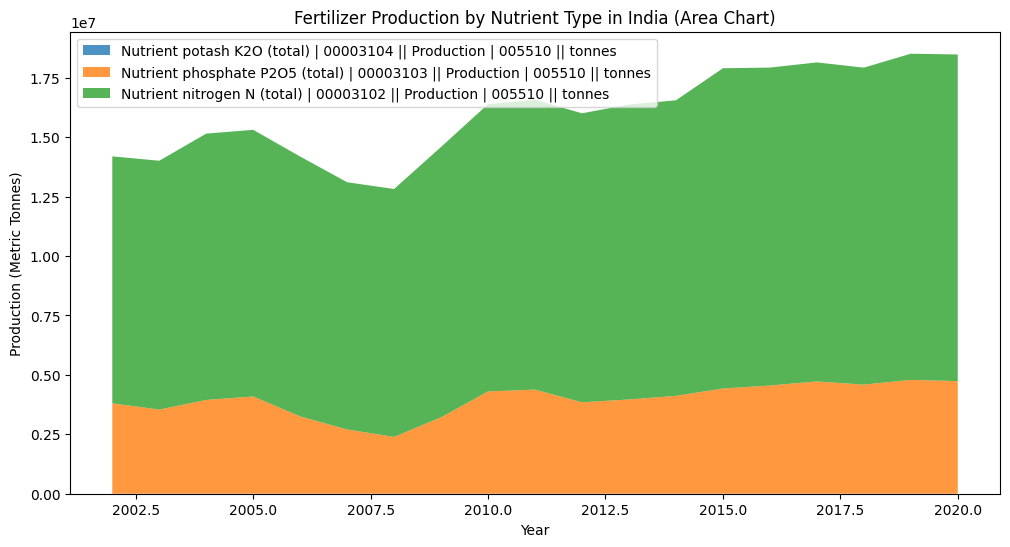

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = "/content/fertilizer-production-by-nutrient-type-npk.csv"
df = pd.read_csv(file_path)

# Filter data for India using the 'Entity' column
india_data = df[df['Entity'] == 'India']

# Extract relevant columns for the area chart
years = india_data['Year']
nutrient_columns = ['Nutrient potash K2O (total) | 00003104 || Production | 005510 || tonnes',
                    'Nutrient phosphate P2O5 (total) | 00003103 || Production | 005510 || tonnes',
                    'Nutrient nitrogen N (total) | 00003102 || Production | 005510 || tonnes']

# Print out values for Potash
print("Potash values for India:")
print(india_data[nutrient_columns[0]])

# Data Visualization - Area Chart
plt.figure(figsize=(12, 6))
plt.stackplot(years, india_data[nutrient_columns].T, labels=nutrient_columns, alpha=0.8)
plt.title('Fertilizer Production by Nutrient Type in India (Area Chart)')
plt.xlabel('Year')
plt.ylabel('Production (Metric Tonnes)')
plt.legend(loc='upper left')
plt.show()




In [ ]:
import pandas as pd
import plotly.express as px

# Load the fertilizer dataset
fertilizer_path = '/content/fertilizer-production-by-nutrient-type-npk.csv'
fertilizer_df = pd.read_csv(fertilizer_path)

# Display the first few rows of the dataset
fertilizer_df.head()


,Entity,Code,Year,Nutrient potash K2O (total) | 00003104 || Production | 005510 || tonnes,Nutrient phosphate P2O5 (total) | 00003103 || Production | 005510 || tonnes,Nutrient nitrogen N (total) | 00003102 || Production | 005510 || tonnes
0,Afghanistan,AFG,2002,0.0,0.0,23414.0
1,Afghanistan,AFG,2003,0.0,0.0,16206.0
2,Afghanistan,AFG,2013,0.0,1539.0,15694.0
3,Afghanistan,AFG,2014,0.0,1541.0,14416.0
4,Afghanistan,AFG,2015,0.0,1541.0,14416.0


In [ ]:
import pandas as pd
import plotly.express as px

# Load the fertilizer dataset
fertilizer_path = '/content/fertilizer-production-by-nutrient-type-npk.csv'
fertilizer_df = pd.read_csv(fertilizer_path)

# Filter the dataset for India
india_df = fertilizer_df[fertilizer_df['Entity'] == 'India']

# Melt the dataset to reshape it for the area chart
melted_df = pd.melt(india_df, id_vars=['Entity', 'Code', 'Year'],
                    value_vars=['Nutrient phosphate P2O5 (total) | 00003103 || Production | 005510 || tonnes',
                                'Nutrient nitrogen N (total) | 00003102 || Production | 005510 || tonnes'],
                    var_name='Nutrient Type', value_name='Fertilizer Production (tonnes)')

# Create a focused area chart for fertilizer production by nutrient type in India
fig = px.area(
    melted_df,
    x='Year',
    y='Fertilizer Production (tonnes)',
    color='Nutrient Type',
    labels={'Fertilizer Production (tonnes)': 'Fertilizer Production (tonnes)'},
    title='Fertilizer Production by Nutrient Type in India',
)

# Show the chart
fig.show()



In [ ]:
india_df['Nutrient potash K2O (total) | 00003104 || Production | 005510 || tonnes'].unique()


array([ 0., nan])

In [ ]:
import pandas as pd

# Load the excess nitrogen dataset
excess_nitrogen_path = '/content/share-global-excess-nitrogen (1).csv'
excess_nitrogen_df = pd.read_csv(excess_nitrogen_path)

# Display the first few rows of the dataset
excess_nitrogen_df.head()


,Entity,Code,Year,share_global_excess_nitrogen
0,Afghanistan,AFG,2009,0.015
1,Albania,ALB,2009,0.033
2,Algeria,DZA,2009,0.101
3,Angola,AGO,2009,-0.007
4,Antigua and Barbuda,ATG,2009,0.000


In [ ]:
# Check for missing values
missing_values = excess_nitrogen_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Summarize statistics
summary_statistics = excess_nitrogen_df.describe()
print("\nSummary Statistics:\n", summary_statistics)

# Explore unique values in relevant columns
unique_values_countries = excess_nitrogen_df['Entity'].unique()
print("\nUnique Countries:\n", unique_values_countries)


Missing Values:
 Entity                          0
Code                            0
Year                            0
share_global_excess_nitrogen    0
dtype: int64

Summary Statistics:
          Year  share_global_excess_nitrogen
count   193.0                    193.000000
mean   2009.0                      0.518109
std       0.0                      2.803314
min    2009.0                     -0.211000
25%    2009.0                      0.001000
50%    2009.0                      0.032000
75%    2009.0                      0.183000
max    2009.0                     32.806000

Unique Countries:
 ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'Central African 

In [ ]:
import pandas as pd

# Load the excess nitrogen dataset
excess_nitrogen_path = '/content/share-global-excess-nitrogen (1).csv'
excess_nitrogen_df = pd.read_csv(excess_nitrogen_path)

# Check for missing values
missing_values = excess_nitrogen_df.isnull().sum()
print("Missing Values:\n", missing_values)

# Summarize statistics
summary_statistics = excess_nitrogen_df.describe()
print("\nSummary Statistics:\n", summary_statistics)

# Explore unique values in relevant columns
unique_values_columns = {}
for column in excess_nitrogen_df.columns:
    unique_values_columns[column] = excess_nitrogen_df[column].unique()

print("\nUnique Values in Columns:")
for column, unique_values in unique_values_columns.items():
    print(f"{column}:\n{unique_values}\n")





Missing Values:
 Entity                          0
Code                            0
Year                            0
share_global_excess_nitrogen    0
dtype: int64

Summary Statistics:
          Year  share_global_excess_nitrogen
count   193.0                    193.000000
mean   2009.0                      0.518109
std       0.0                      2.803314
min    2009.0                     -0.211000
25%    2009.0                      0.001000
50%    2009.0                      0.032000
75%    2009.0                      0.183000
max    2009.0                     32.806000

Unique Values in Columns:
Entity:
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Cayman Islands' 'C

In [ ]:
# Print the list of columns in the excess nitrogen dataset
print("Columns:", excess_nitrogen_df.columns)


Columns: Index(['Entity', 'Code', 'Year', 'share_global_excess_nitrogen'], dtype='object')


In [ ]:
import pandas as pd
import plotly.express as px

# Load the excess nitrogen dataset
excess_nitrogen_path = '/content/share-global-excess-nitrogen (1).csv'
excess_nitrogen_df = pd.read_csv(excess_nitrogen_path)

# Check for missing values and drop rows with missing values in the relevant column
column_name = 'share_global_excess_nitrogen'
excess_nitrogen_df_clean = excess_nitrogen_df.dropna(subset=[column_name])

# Sort the dataset by the excess nitrogen share in descending order
top_countries_df = excess_nitrogen_df_clean.sort_values(by=column_name, ascending=False).head(10)

# Create a bar chart for the top 10 countries with excess nitrogen
fig = px.bar(
    top_countries_df,
    x='Entity',
    y=column_name,
    labels={column_name: 'Share of Excess Nitrogen (%)'},
    title='Top 10 Countries with Excess Nitrogen'
)

# Customize the chart layout if needed
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='Share of Excess Nitrogen (%)'
)

# Show the chart
fig.show()


In [ ]:
# Print the list of columns in the excess phosphorous dataset
excess_phosphorous_path = '/content/share-global-excess-phosphorous.csv'
excess_phosphorous_df = pd.read_csv(excess_phosphorous_path)
print("Columns:", excess_phosphorous_df.columns)


Columns: Index(['Entity', 'Code', 'Year', 'share_global_excess_phosphorous'], dtype='object')


In [ ]:
import pandas as pd
import plotly.express as px

# Load the excess phosphorous dataset
excess_phosphorous_path = '/content/share-global-excess-phosphorous.csv'
excess_phosphorous_df = pd.read_csv(excess_phosphorous_path)

# Check for missing values and drop rows with missing values in the relevant column
column_name = 'share_global_excess_phosphorous'
excess_phosphorous_df_clean = excess_phosphorous_df.dropna(subset=[column_name])

# Sort the dataset by the excess phosphorous share in descending order
top_countries_df = excess_phosphorous_df_clean.sort_values(by=column_name, ascending=False).head(10)

# Create a bar chart for the top 10 countries with excess phosphorous
fig = px.bar(
    top_countries_df,
    x='Entity',
    y=column_name,
    labels={column_name: 'share_global_excess_phosphorous (%)'},
    title='Top 10 Countries with Excess Phosphorous'
)

# Customize the chart layout if needed
fig.update_layout(
    xaxis_title='Country',
    yaxis_title='share_global_excess_phosphorous (%)'
)

# Show the chart
fig.show()
